In [21]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "merley has the best squooshy kitten belly.",
    "Google Translate app is incredible.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.",
    "Climbing ninja cat.",
    "Impressed with google map feedback.",
    "Key promoter extension for Goole Chrome."
]

#documents

In [24]:
from os import listdir

def fileids(path, ext="txt"):
    return [path+file for file in listdir(path) if file.split(".")[-1] == ext]

len(fileids("./특강0610/Testing_Data2/")),fileids("./특강0610/Testing_Data2/")

(120,
 ['./특강0610/Testing_Data2/IT-0000003610.txt',
  './특강0610/Testing_Data2/IT-0000003645.txt',
  './특강0610/Testing_Data2/IT-0000023785.txt',
  './특강0610/Testing_Data2/IT-0000391959.txt',
  './특강0610/Testing_Data2/IT-0000429578.txt',
  './특강0610/Testing_Data2/IT-0000429582.txt',
  './특강0610/Testing_Data2/IT-0000429748.txt',
  './특강0610/Testing_Data2/IT-0000431365.txt',
  './특강0610/Testing_Data2/IT-0000431369.txt',
  './특강0610/Testing_Data2/IT-0002072012.txt',
  './특강0610/Testing_Data2/IT-0002158229.txt',
  './특강0610/Testing_Data2/IT-0002158415.txt',
  './특강0610/Testing_Data2/IT-0002158455.txt',
  './특강0610/Testing_Data2/IT-0002159710.txt',
  './특강0610/Testing_Data2/IT-0002447117.txt',
  './특강0610/Testing_Data2/IT-0002794553.txt',
  './특강0610/Testing_Data2/IT-0002794564.txt',
  './특강0610/Testing_Data2/IT-0002794599.txt',
  './특강0610/Testing_Data2/IT-0002892231.txt',
  './특강0610/Testing_Data2/IT-0002985192.txt',
  './특강0610/Testing_Data2/경제-0000369630.txt',
  './특강0610/Testing_Data2/경제

In [26]:
def filecontent(file) :
    with open(file, encoding="utf-8") as fp :
        content = fp.read()
    return content

def ngram(term, n=2) :
    return [term[i:i+n] for i in range(len(term) - n + 1)]


In [28]:
from string import punctuation
import re

pattern = dict()

# 구두점
pattern["punc"] = re.compile(r"[{0}]".format(re.escape(punctuation)))

# 불용어
pattern["stopword"] = re.compile(r"[A-Za-z0-9]{7,}")

# Email \w{2,}@\w{3,}(.\w{2,})
pattern["email"] = re.compile(r"\w{2,}@\w{3,}(.\w{2,})")

# 도메인
pattern["domain"] = re.compile(r"(\.?\w{2,}){2,}")

# 한글이외
pattern["nonkorea"] = re.compile(r"[^가-힣0-9]+")

# 반복 공백문자
pattern["whitespace"] = re.compile(r"\s{2,}")


In [30]:
from collections import defaultdict
#원시어절, 구두점, 불용어, 길이, 빈도, 정규식, 품사분석(형태소), ngram
from nltk.tokenize import word_tokenize
from konlpy.tag import Komoran

ma = Komoran()

indexTerm = defaultdict(int)
indexTerm1 = defaultdict(int)
indexTerm2 = defaultdict(int)
indexTerm3 = defaultdict(int)
indexTerm4 = defaultdict(int)
indexTerm5 = defaultdict(int)

for file in fileids("./특강0610/Testing_Data2/") :
    content = filecontent(file)
    
    for _ in ["punc", "stopword", "email", "domain", "nonkorea", "whitespace"] :
        content = pattern[_].sub(" ", content)

    # 원시어절
    for term in word_tokenize(content) :
        indexTerm1[term] += 1  # 원시 어절
        indexTerm[term] += 1  

    # 토플    
    for _ in indexTerm1 :
        for t in ma.pos(_) :
            indexTerm2[t] += 1  # 원시형태소 + 품사
            indexTerm[t[0]] += 1  
            if len(t[0]) > 1 :   # 음절 길이로 정규화
                indexTerm3[t[0]] += 1  # 원시형태소
                indexTerm[t[0]] += 1  
            if t[1].startswith("N"):
                indexTerm4[t] += 1  # 명사
                indexTerm[t[0]] += 1  
            for n in ngram(t[0]) :   # Bigram
                indexTerm5[n] += 1  # 
                indexTerm[n] += 1  

len(indexTerm1), len(indexTerm2), len(indexTerm3), len(indexTerm4), len(indexTerm), \
min(indexTerm5.values()),max(indexTerm5.values())
#indexTerm  

(10738, 5896, 4841, 4561, 14334, 1, 4022)

In [ ]:
def idxTerm(content) :
    
    indexTerm = defaultdict(int)
    indexTerm1 = defaultdict(int)
    indexTerm2 = defaultdict(int)
    indexTerm3 = defaultdict(int)
    indexTerm4 = defaultdict(int)
    indexTerm5 = defaultdict(int)
    indexTerm6 = defaultdict(int)
    
    for _ in ["punc", "stopword", "email", "domain", "nonkorea", "whitespace"] :
        content = pattern[_].sub(" ", content)

    # 원시어절
    for term in word_tokenize(content) :
        indexTerm1[term] += 1  # 원시 어절
        indexTerm[term] += 1  

    # 토플    
    for _ in indexTerm1 :
        
        for t in ma.nouns(_) :
        
            if len(t) > 1 :
                indexTerm6[t] += 1  # 
#         for t in ma.pos(_) :
#             indexTerm2[t] += 1  # 원시형태소 + 품사
#             indexTerm[t[0]] += 1  
#             if len(t[0]) > 1 :   # 음절 길이로 정규화
#                 indexTerm3[t[0]] += 1  # 원시형태소
#             if t[1].startswith("NN") :
#                 indexTerm4[t] += 1  # 명사
#             for n in ngram(t[0]) :   # Bigram
#                 indexTerm5[n] += 1  # 
    
    return indexTerm6

In [ ]:
documents = list()
for file in fileids("./특강0610/Testing_Data2/") :
    content = filecontent(file)
    documents.append(content)

documents

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict
import re

In [ ]:
# DTM -> TDM -> TWM
# DTM = defaultdict(lambda:defaultdict(int))
# for i, d  in enumerate(documents):
#     for t in word_tokenize(d.lower()) :
#         if t not in stopwords.words("english") and not re.search(r"[%s]" % re.escape(punctuation), t) :
#             DTM[i][t] += 1
DTM = defaultdict(lambda:defaultdict(int))
for i, d  in enumerate(documents):
    for t in idxTerm(d) :
        DTM[i][t] += 1

DTM        

In [ ]:
TDM = defaultdict(lambda:defaultdict(int))
for d, termList in DTM.items() :
    for t, f in termList.items() :
        TDM[t][d] = f

#TDM

In [115]:
K = 3
N = 100 # [[?,?], [], []]

In [116]:
from math import log2

TWM = defaultdict(lambda:defaultdict(float))
N = len(DTM)

for term, docList in TDM.items() :
    
    df = len(docList)
    
    for d, f in docList.items() :
        maxFreq = max(DTM[d].values())
        TF = f/maxFreq
        IDF = log2(N/df)
        
        TWM[term][d] = TF*IDF
#TWM[단어][문서:가중치, ...]


In [117]:
from math import sqrt

def distance(x1, x2) :
    _sum  = 0
    for i in range(len(x1)) :
        _sum += (x1[i]-x2[i])**2
    return sqrt(_sum)

def angle(x1, x2) :
    _innerProduct = 0
    for i in range(len(x1)) :
        _innerProduct += x1[i]*x2
    x1VecLength = distance(x1,[0 for _ in range(len(x1))])
    x2VecLength = distance(x1,[0 for _ in range(len(x1))])
    return _innerProduct/(x1VecLength*x2VecLength)

In [118]:
# EM algorithm
# E-Expertation = rnk assignement => distance
# M-Maximization = centroid update
def expectation(x, c , opt=False) :
    candidates = list()
    nearest = distance if not opt else angle
    best = min if not opt else max
    
    for _ in c:
        candidates.append(nearest(x,_))
    return candidates.index(best(candidates))

In [119]:
def maximization(X) :
    _sum = [ 0 for _ in range(len(X[0]))]
    D = len(X)
    for x in X :
        for i in range(len(x)) :
            _sum[i] += x[i]
    return [ _/D for _ in _sum]


In [120]:
def sse(X, c , opt=False) :
    error = 0
    nearest = distance if not opt else angle
    for x in X :
        error += nearest(x,c )
    return error

In [121]:
docVectorList = [[ 0 for _ in range(len(TDM))] for _ in range(N)]
D = list(DTM.keys())
V = list(TDM.keys())

for t, docList in TWM.items() :
    for d, w in docList.items() :
        docVectorList[D.index(d)][V.index(t)] = w

In [122]:
print(docVectorList[0])
print(D[0], V[:6])

[6.906890595608519, 2.9068905956085187, 4.099535673550914, 2.514573172829758, 3.584962500721156, 2.263034405833794, 3.736965594166206, 3.321928094887362, 4.906890595608519, 6.906890595608519, 1.9068905956085185, 6.906890595608519, 6.906890595608519, 4.906890595608519, 3.4474589769712214, 5.906890595608519, 0.33703498727757064, 0.38332863955150565, 2.321928094887362, 4.906890595608519, 4.321928094887363, 4.321928094887363, 3.4474589769712214, 4.584962500721156, 0.4150374992788437, 2.3833286395515056, 6.906890595608519, 3.0995356735509145, 4.321928094887363, 3.0995356735509145, 3.206450877467426, 2.15200309344505, 5.906890595608519, 5.906890595608519, 0.13870627083159226, 3.9068905956085187, 0.30697775342139094, 2.9068905956085187, 5.321928094887363, 4.321928094887363, 3.584962500721156, 3.736965594166206, 5.321928094887363, 5.906890595608519, 1.584962500721156, 2.658963082164933, 5.321928094887363, 2.736965594166206, 4.584962500721156, 6.906890595608519, 6.906890595608519, 6.90689059560

In [123]:
len(docVectorList), len(documents), len(docVectorList[0]), len(TDM)

(120, 120, 4464, 4464)

In [124]:
# K :
# _iter :

K = 2
centroid = [[randrange(0,4) for _ in range(len(V))] for _ in range(K)]
_iter = 10
sseList = list()
            
for _ in range(_iter) :
    rnk = list(list( 0 for _ in range(K)) for _ in range(len(D)))
    for i , x in enumerate(docVectorList) :
        idx = expectation(x, centroid)
        rnk[i][idx] = 1
    _sum = 0.0
                                           
    for k in range(K) :
        _X = [docVectorList[i] for i in range(len(D)) if rnk[i][k]]
        _sum += sse(_X, centroid[k])
        centroid[k] = maximization(_X)
    
    sseList.append(_sum)
    

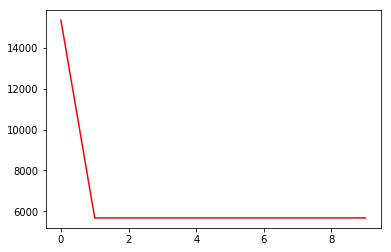

In [125]:
import matplotlib.pyplot as plt
plt.plot(range(_iter), sseList,"r-")
plt.show()

In [126]:
for k in range(K) :
    _X = [ i for i in range(len(D)) if rnk[i][k]]
    print("Cluster : ", k)
    for x in _X :
        print(documents[x])

Cluster :  0
애플이 '에어팟 2세대'를 3월20일(현지시간) 발표했다. 에어팟 2세대는 전작과 큰 변화 없이 내부 성능을 개선하는 데 초점을 맞춘 제품이다.에어팟 2세대는 외관상 변화가 거의 없다. 콩나물 디자인을 그대로 유지했다. 달라진 점은 애플이 새롭게 설계한 H1 칩이다. H1 칩은 헤드폰과 이어폰 전용으로 개발됐다. 이전에는 애플워치에 적용된 W1 칩을 사용했다. H1 칩은 고효율 성능과 더욱 빨라진 연결 시간, 더 긴 통화 시간, 시리 음성 호출 기능을 제공한다. 또 에어팟 2세대는 블루투스 5.0을 지원한다.애플 H1 칩은 에어팟 1세대에 탑재된 W1 칩보다 최대 1시간 더 긴 통화 시간을 제공한다. 애플은 50% 통화 시간이 개선됐다고 밝혔다. 에어팟 2세대는 한 번 충전으로 5시간의 음악 재생 시간, 최대 3시간의 통화 시간을 제공한다.기기 연결 시간은 2배 빨라졌다. 이를 통해 아이폰이나 애플워치, 아이패드 등에서 음악을 듣는 중에도 끊김 없이 기기 간 전환을 할 수 있다. 에어팟 1세대에서는 기기를 전환할 때 체감할 수 있는 지연 시간이 발생했다. 게임 지연도 최대 30% 줄었다.음성으로 인공지능(AI) 비서 '시리'를 호출할 수 있는 '시리야' 기능도 추가됐다. 이전 에어팟에서는 몸체를 두드리는 방식으로 시리를 호출할 수 있었다. 에어팟 2세대는 아이폰이나 아이패드에 적용된 것처럼 "시리야"라고 말하면 바로 시리가 등장한다. 노래를 바꾸거나 전화를 걸고, 음량을 조절하고, 경로 정보를 확인할 수 있다.또 일반 충전 케이스 외에 무선 충전 케이스가 추가됐다. 무선 충전 케이스는 Qi-호환 충전기를 통해 선 없이 충전할 수 있다. 케이스 전면에 있는 LED 표시등을 통해 충전 상태를 알 수 있다. 유선 충전도 가능하다. 두 케이스 모두 24시간 이상 사용 시간을 제공한다.에어팟 2세대 기본 충전 케이스 모델은 19만9천원, 무선 충전 케이스 모델은 24만9천원이다. 무선 충전 케이스 단품을 9만9천원에 구매할 수도 있다. 한국에는 

In [127]:
result = list()

for k in range(K) :
    W = [(V[i],centroid[k][i]) for i in range(len(V)) if centroid[k][i] ]
    #print([ {V[i]:centroid[k][i]} for i in range(len(V)) if centroid[k][i]])
    result.append(sorted(W, key=lambda x:x[1], reverse=True )[:30])
    print(sorted(W, key=lambda x:x[1] , reverse=True)[:30] )


[(('관련', 'NNG'), 0.6663515839659413), (('명', 'NNB'), 0.6478248613043704), (('미국', 'NNP'), 0.6356301985361728), (('후', 'NNG'), 0.6150134891230326), (('자신', 'NNG'), 0.6085610647973667), (('사진', 'NNG'), 0.5938394561956729), (('문제', 'NNG'), 0.5838087444311785), (('라고', 'NNP'), 0.5742617756236069), (('게', 'NNG'), 0.5668467536413241), (('국민', 'NNG'), 0.5652173913043478), (('서울', 'NNP'), 0.5613545619530562), (('무단', 'NNP'), 0.5613507522817708), (('전재', 'NNP'), 0.5613507522817708), (('해외', 'NNG'), 0.5576436308639001), (('때문', 'NNB'), 0.5538151169805297), (('내용', 'NNG'), 0.5394997558015807), (('사용', 'NNG'), 0.5390496823566808), (('일본', 'NNP'), 0.5390496823566808), (('오전', 'NNP'), 0.5384181089593884), (('뿐', 'NNB'), 0.529582739764652), (('진행', 'NNG'), 0.5244851450738576), (('삶', 'NNG'), 0.5217391304347826), (('이날', 'NNG'), 0.5181149216416319), (('정부', 'NNG'), 0.5172769050777616), (('때', 'NNG'), 0.5172762110428808), (('이상', 'NNG'), 0.5166113308633473), (('채널', 'NNP'), 0.5166113308633473), (('지난해'

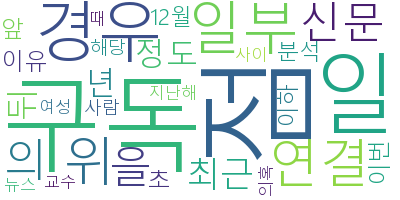

In [128]:
from wordcloud import WordCloud
font = 'C:/Windows/Fonts/malgunsl.ttf'

data = { x[0][0]:x[1] for x in result[1]}
wc = WordCloud(font, max_words=30 , background_color = "white")
wc.generate_from_frequencies(data)
wc.to_image()
